In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("ML_ready.csv")

In [3]:
df.head()

,Unnamed: 0,bmp,emp,seg_length,gis_miles,symbol,jurisdiction_c,jurisdiction_fs,jurisdiction_of,jurisdiction_ofs,...,districtname_yolla bolla ranger district,districtname_yuba river ranger district,districtname_zigzag ranger district,sbs_symbol_name_gravel road,sbs_symbol_name_paved road,sbs_symbol_name_road,routestatus_ existing,ta_symbol_4,ta_symbol_5,ta_symbol_6
0,0,0.0,0.225,0.225,0.218,3,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,0.0,2.160,2.160,2.153,11,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2,0.0,0.281,0.281,0.380,3,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
3,3,0.0,0.400,0.400,0.230,3,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,4,0.0,2.375,2.375,2.451,3,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

---
---

In [6]:
X = df.drop("symbol", axis=1)

y = df["symbol"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y, random_state=111)

# KNN 

In [7]:
knn_model=KNeighborsClassifier().fit(X_train, y_train)

[[19717   104    37     5     1     0]
 [  379  6120     9    14     1     0]
 [   16    12 11489   109     1     0]
 [    4    12   392  2909     0     2]
 [    9     1    36     3   478    14]
 [    7    38    19    14    21   352]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     19864
           2       0.97      0.94      0.96      6523
           3       0.96      0.99      0.97     11627
           4       0.95      0.88      0.91      3319
          11       0.95      0.88      0.92       541
          12       0.96      0.78      0.86       451

    accuracy                           0.97     42325
   macro avg       0.96      0.91      0.93     42325
weighted avg       0.97      0.97      0.97     42325



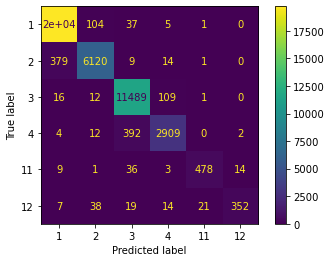

In [8]:
y_pred=knn_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(knn_model,X_test,y_test)

print(classification_report(y_test, y_pred))


---
---

# LOGREG 

In [9]:
logreg = LogisticRegression().fit(X_train, y_train)

[[19824     5    26     2     7     0]
 [   78  6425     3    16     0     1]
 [    6     6 11596     9    10     0]
 [    1    10    56  3247     3     2]
 [    4     0    16     0   521     0]
 [    0    25     3     7     4   412]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19864
           2       0.99      0.98      0.99      6523
           3       0.99      1.00      0.99     11627
           4       0.99      0.98      0.98      3319
          11       0.96      0.96      0.96       541
          12       0.99      0.91      0.95       451

    accuracy                           0.99     42325
   macro avg       0.99      0.97      0.98     42325
weighted avg       0.99      0.99      0.99     42325



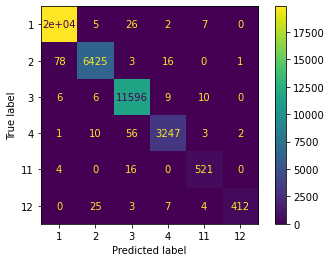

In [10]:
y_pred=logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(logreg,X_test,y_test)

print(classification_report(y_test, y_pred))


---
---

# RF 

In [11]:
rf_mod = RandomForestClassifier().fit(X_train, y_train)

[[19809    33    15     2     5     0]
 [   46  6457     2     6     0    12]
 [    2     2 11614     6     2     1]
 [    0     8    20  3289     0     2]
 [    2     0     3     0   531     5]
 [    0    13     4     0     2   432]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19864
           2       0.99      0.99      0.99      6523
           3       1.00      1.00      1.00     11627
           4       1.00      0.99      0.99      3319
          11       0.98      0.98      0.98       541
          12       0.96      0.96      0.96       451

    accuracy                           1.00     42325
   macro avg       0.99      0.99      0.99     42325
weighted avg       1.00      1.00      1.00     42325



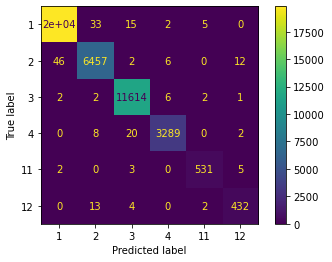

In [12]:
y_pred = rf_mod.predict(X_test)

print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(rf_mod,X_test,y_test)

print(classification_report(y_test,y_pred))


----
----

# XGBOOST 

In [7]:
xgb_classifier = XGBClassifier().fit(X_train , y_train)

[[31721    28    23     2     7     0]
 [   90 10328     2    12     0     5]
 [   16     9 18562    10     6     1]
 [    2    12    49  5245     0     2]
 [    2     0    13     0   847     3]
 [    0    26     6     1     3   686]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     31781
           2       0.99      0.99      0.99     10437
           3       1.00      1.00      1.00     18604
           4       1.00      0.99      0.99      5310
          11       0.98      0.98      0.98       865
          12       0.98      0.95      0.97       722

    accuracy                           1.00     67719
   macro avg       0.99      0.98      0.99     67719
weighted avg       1.00      1.00      1.00     67719



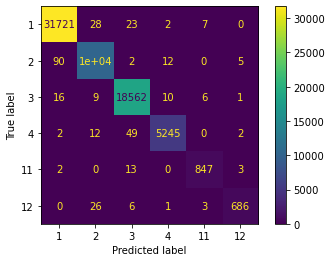

In [9]:
y_pred = xgb_classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(xgb_classifier,X_test,y_test)

print(classification_report(y_test,y_pred))

In [16]:
accuraries = cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train,n_jobs =-1, verbose=5, cv=3)
accuraries.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.4min finished


0.9952745487194027